In [136]:
import pandas as pd
import numpy as np

# EDA

In [137]:
data=pd.read_csv(r'C:\Users\Mtime\OneDrive\Bureau\imdb_processed.csv')

In [138]:
#data.head()

In [139]:
# change le nom de index
del  data['Unnamed: 0']

In [140]:
data['year'] = data['year'].astype(int)


In [141]:
data.describe()

,year,rating,vote,runtime
count,8451.000000,8135.000000,8.135000e+03,6798.000000
mean,1991.626080,6.680000,1.873295e+04,99.984113
std,15.129001,1.281778,8.957999e+04,65.277725
min,1905.000000,1.500000,5.000000e+00,2.000000
25%,1987.000000,6.000000,3.075000e+02,82.000000
50%,1998.000000,6.900000,1.531000e+03,95.000000
75%,2002.000000,7.600000,6.897500e+03,110.000000
max,2005.000000,9.600000,2.462087e+06,1620.000000


In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8451 entries, 0 to 8450
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   title     8451 non-null   object 
 1   year      8451 non-null   int32  
 2   kind      8451 non-null   object 
 3   genre     8384 non-null   object 
 4   rating    8135 non-null   float64
 5   vote      8135 non-null   float64
 6   country   8152 non-null   object 
 7   language  8052 non-null   object 
 8   cast      8280 non-null   object 
 9   director  7140 non-null   object 
 10  composer  5722 non-null   object 
 11  writer    7204 non-null   object 
 12  runtime   6798 non-null   float64
dtypes: float64(3), int32(1), object(9)
memory usage: 825.4+ KB


In [143]:
# we will change the type of data for :
# year 

In [144]:
data.isna().sum()

title          0
year           0
kind           0
genre         67
rating       316
vote         316
country      299
language     399
cast         171
director    1311
composer    2729
writer      1247
runtime     1653
dtype: int64

In [145]:
for i in data.columns:
    null_rate = data[i].isna().sum() / len(data) * 100
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

genre null rate: 0.79%
rating null rate: 3.74%
vote null rate: 3.74%
country null rate: 3.54%
language null rate: 4.72%
cast null rate: 2.02%
director null rate: 15.51%
composer null rate: 32.29%
writer null rate: 14.76%
runtime null rate: 19.56%


In [146]:
data.shape

(8451, 13)

In [147]:
1653/8451


0.19559815406460773

In [148]:
#data['director'].replace(np.nan, 'No Data',inplace  = True)

In [149]:
#plt.figure(figsize=(11,9))
#sns.heatmap(data.corr(),square=True,annot=True,cmap='twilight_shifted')

In [150]:
#data['genre'].unique()

In [151]:
#data genre splitting
data['genre'] = data['genre'].str.strip('[]')
genre = data.genre.str.split(',').apply(pd.Series)
genre = genre.drop(columns= [3,4,5,6,7,8,9,10])
genre=genre.rename(columns={0: "genre1", 1: "genre2"})

In [152]:
data = data.join(genre)
data = data.drop(columns='genre')

In [153]:
#country
data['country'] = data['country'].str.strip('[]')
country = data.country.str.split(',').apply(pd.Series)
country = country.drop(columns= [2,3,4,5,6,7,8,9,10])
country=country.rename(columns={0: "country1", 1: "country2"})

In [154]:
data = data.join(country)
data = data.drop(columns='country')

In [155]:
#language
data['language'] = data['language'].str.strip('[]')
language = data.language.str.split(',').apply(pd.Series)
language = language.drop(columns= [2,3,4,5,6,7,8,9,10])
language=language.rename(columns={0: "language1", 1: "language2"})

In [156]:
data = data.join(language)
data = data.drop(columns='language')

In [157]:
#cast
data['cast'] = data['cast'].str.strip('[]')
cast = data.cast.str.split(',').apply(pd.Series)
cast= cast[[0,1]]
cast=cast.rename(columns={0: "cast1", 1: "cast2"})


In [158]:
data = data.join(cast)
data = data.drop(columns='cast')

In [159]:
#director
data['director'] = data['director'].str.strip('[]')
director = data.director.str.split(',').apply(pd.Series)
director = director.drop(columns= [2])
director=director.rename(columns={0: "director1", 1: "director2"})

In [160]:
data = data.join(director)
data = data.drop(columns='director')

In [161]:
#writer
data['writer'] = data['writer'].str.strip('[]')
writer = data.writer.str.split(',').apply(pd.Series)
writer = writer.drop(columns= [2])
writer=writer.rename(columns={0: "writer1", 1: "writer2"})

In [162]:
data = data.join(writer)
data = data.drop(columns='writer')

In [163]:
data=data.rename(columns={2: "genre3"})

In [164]:
#composer
data['composer'] = data['composer'].str.strip('[]')
composer = data.composer.str.split(',').apply(pd.Series)
composer = composer.drop(columns= [2,3,4,5,6,7,8,9])
composer=composer.rename(columns={0: "composer1", 1: "composer2"})

In [165]:
data = data.join(composer)
data = data.drop(columns='composer')

In [166]:
data.isna().sum()

title           0
year            0
kind            0
rating        316
vote          316
runtime      1653
genre1         67
genre2       1952
genre3       4594
country1      299
country2     6811
language1     399
language2    6731
cast1         171
cast2         487
director1    1311
director2    7692
writer1      1247
writer2      3338
composer1    2729
composer2    7433
dtype: int64

In [167]:
#after checking the results we consider to delete 
#language2     6731
#director2     7692
#country2       6811
#composer2      7433
#genre3          4594
#writer2       3338
#composer1     2729

data = data.drop(columns=['genre2','composer2','language2','director2','country2','composer1','composer2','genre3','writer2','cast2'])


In [168]:
data.isna().sum()

title           0
year            0
kind            0
rating        316
vote          316
runtime      1653
genre1         67
country1      299
language1     399
cast1         171
director1    1311
writer1      1247
dtype: int64

In [169]:
data['director1']=np.where(data['director1'].isna()==True,'None',data['director1'])

In [170]:
data['writer1']=np.where(data['writer1'].isna()==True,'None',data['writer1'])

In [171]:
data['genre1']=np.where(data['genre1'].isna()==True,'None',data['genre1'])

In [172]:
data['country1']=np.where(data['country1'].isna()==True,'None',data['country1'])

In [173]:
data['language1']=np.where(data['language1'].isna()==True,'None',data['language1'])

In [174]:
data['cast1']=np.where(data['cast1'].isna()==True,'None',data['cast1'])

In [175]:
data['cast1']=np.where(data['cast1'].isna()==True,'None',data['cast1'])

In [176]:
data

,title,year,kind,rating,vote,runtime,genre1,country1,language1,cast1,director1,writer1
0,Dinosaur Planet,2003,tv mini series,7.7,474.0,50.0,'Documentary','United States','English','Christian Slater',None,'Mike Carrol'
1,Get Up and Dance!,1994,video movie,8.1,18.0,83.0,'Family','United States','English','Paula Abdul','Steve Purcell',None
2,8 Man,1992,movie,5.5,93.0,NaN,'Action','Japan','Japanese','Kai Shishido','Yasuhiro Horiuchi','Kazumasa Hirai'
3,What the #$*! Do We (K)now!?,2004,movie,5.3,13432.0,60.0,'Documentary','United States','English','Marlee Matlin','William Arntz','William Arntz'
4,Class of Nuke 'Em High Part II: Subhumanoid Me...,1991,movie,4.5,2177.0,96.0,'Comedy','United States','English','Brick Bronsky','Eric Louzil','Lloyd Kaufman'
...,...,...,...,...,...,...,...,...,...,...,...,...
8446,All Monsters Attack,1969,movie,3.9,4384.0,NaN,'Adventure','Japan','Japanese','Tomonori Yazaki','Ishirô Honda',"""Shin'ichi Sekizawa"""
8447,Fidel Castro,2005,episode,6.4,44.0,NaN,'Documentary',None,'English','Rena Baskin','Adriana Bosch','Adriana Bosch'
8448,Epoch,2001,tv movie,4.9,2376.0,NaN,'Sci-Fi','United States','English','David Keith','Matt Codd','Jonathan Raymond'
8449,The Company,2003,movie,6.3,6501.0,NaN,'Drama','United States','English','Neve Campbell','Robert Altman','Neve Campbell'


In [177]:
data

,title,year,kind,rating,vote,runtime,genre1,country1,language1,cast1,director1,writer1
0,Dinosaur Planet,2003,tv mini series,7.7,474.0,50.0,'Documentary','United States','English','Christian Slater',None,'Mike Carrol'
1,Get Up and Dance!,1994,video movie,8.1,18.0,83.0,'Family','United States','English','Paula Abdul','Steve Purcell',None
2,8 Man,1992,movie,5.5,93.0,NaN,'Action','Japan','Japanese','Kai Shishido','Yasuhiro Horiuchi','Kazumasa Hirai'
3,What the #$*! Do We (K)now!?,2004,movie,5.3,13432.0,60.0,'Documentary','United States','English','Marlee Matlin','William Arntz','William Arntz'
4,Class of Nuke 'Em High Part II: Subhumanoid Me...,1991,movie,4.5,2177.0,96.0,'Comedy','United States','English','Brick Bronsky','Eric Louzil','Lloyd Kaufman'
...,...,...,...,...,...,...,...,...,...,...,...,...
8446,All Monsters Attack,1969,movie,3.9,4384.0,NaN,'Adventure','Japan','Japanese','Tomonori Yazaki','Ishirô Honda',"""Shin'ichi Sekizawa"""
8447,Fidel Castro,2005,episode,6.4,44.0,NaN,'Documentary',None,'English','Rena Baskin','Adriana Bosch','Adriana Bosch'
8448,Epoch,2001,tv movie,4.9,2376.0,NaN,'Sci-Fi','United States','English','David Keith','Matt Codd','Jonathan Raymond'
8449,The Company,2003,movie,6.3,6501.0,NaN,'Drama','United States','English','Neve Campbell','Robert Altman','Neve Campbell'


In [179]:
data['genre1'] = data['genre1'].str.strip("''").astype(object)
data['country1'] = data['country1'].str.strip("''").astype(object)
data['language1'] = data['language1'].str.strip("''").astype(object)
data['cast1'] = data['cast1'].str.strip("''").astype(object)
data['writer1'] = data['writer1'].str.strip("''").astype(object)
data['director1'] = data['director1'].str.strip("''").astype(object)


In [180]:
data.isna().sum()

title           0
year            0
kind            0
rating        316
vote          316
runtime      1653
genre1          0
country1        0
language1       0
cast1           0
director1       0
writer1         0
dtype: int64

In [181]:
# calculate medians for each moovie kind
median_values = data[['runtime','kind']].groupby(['kind']).agg("mean")
median_values

,runtime
kind,
episode,98.230947
movie,99.231426
tv mini series,99.367150
tv movie,103.788491
tv series,102.680154
tv short,70.875000
video game,108.894737
video movie,99.995479


In [182]:
import math
# impute missing values for rating, vote, runtime columns with medians
kinds = ['episode', 'movie', 'tv mini series', 'tv movie', 'tv series', 'tv short', 'video game', 'video movie']
col_impute = ['runtime']
for kind in kinds:
    for col in col_impute:
        for i in range(len(data)):
            if math.isnan(data[col][i])==True:
                if data['kind'][i] == kind:
                    data[col][i]= median_values.at[kind, col]

C:\Users\Mtime\AppData\Local\Temp/ipykernel_3196/3012024400.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][i]= median_values.at[kind, col]


In [183]:
data.isna().sum()

title          0
year           0
kind           0
rating       316
vote         316
runtime        0
genre1         0
country1       0
language1      0
cast1          0
director1      0
writer1        0
dtype: int64

In [184]:
data = data.dropna(subset=['rating'])

In [185]:
data

,title,year,kind,rating,vote,runtime,genre1,country1,language1,cast1,director1,writer1
0,Dinosaur Planet,2003,tv mini series,7.7,474.0,50.000000,Documentary,United States,English,Christian Slater,None,Mike Carrol
1,Get Up and Dance!,1994,video movie,8.1,18.0,83.000000,Family,United States,English,Paula Abdul,Steve Purcell,None
2,8 Man,1992,movie,5.5,93.0,99.231426,Action,Japan,Japanese,Kai Shishido,Yasuhiro Horiuchi,Kazumasa Hirai
3,What the #$*! Do We (K)now!?,2004,movie,5.3,13432.0,60.000000,Documentary,United States,English,Marlee Matlin,William Arntz,William Arntz
4,Class of Nuke 'Em High Part II: Subhumanoid Me...,1991,movie,4.5,2177.0,96.000000,Comedy,United States,English,Brick Bronsky,Eric Louzil,Lloyd Kaufman
...,...,...,...,...,...,...,...,...,...,...,...,...
8446,All Monsters Attack,1969,movie,3.9,4384.0,99.231426,Adventure,Japan,Japanese,Tomonori Yazaki,Ishirô Honda,"""Shin'ichi Sekizawa"""
8447,Fidel Castro,2005,episode,6.4,44.0,98.230947,Documentary,None,English,Rena Baskin,Adriana Bosch,Adriana Bosch
8448,Epoch,2001,tv movie,4.9,2376.0,103.788491,Sci-Fi,United States,English,David Keith,Matt Codd,Jonathan Raymond
8449,The Company,2003,movie,6.3,6501.0,99.231426,Drama,United States,English,Neve Campbell,Robert Altman,Neve Campbell


In [186]:
data=data.rename(columns={'genre1': "Genre", 'country1': "Country",'language1': "Language",'cast1': "Cast",'director1':"Director",'writer1':"Writer",'composer1':"Composer"})


In [187]:
data['rating'] = round(data['rating']).astype('int')


In [188]:
data.isna().sum()

title       0
year        0
kind        0
rating      0
vote        0
runtime     0
Genre       0
Country     0
Language    0
Cast        0
Director    0
Writer      0
dtype: int64

In [189]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

Object_list = data.select_dtypes(include = "object").columns
le = LabelEncoder()
for col in data[Object_list]:
    data[col] = le.fit_transform(data[col].astype(str))

In [190]:
data

,title,year,kind,rating,vote,runtime,Genre,Country,Language,Cast,Director,Writer
0,1773,2003,2,8,474.0,50.000000,6,63,16,867,2862,3319
1,2424,1994,7,8,18.0,83.000000,8,63,16,3628,3673,3507
2,85,1992,1,6,93.0,99.231426,0,37,33,2513,4078,2610
3,7538,2004,1,5,13432.0,60.000000,6,63,16,3047,4023,4893
4,1349,1991,1,4,2177.0,96.000000,4,63,16,639,1124,2893
...,...,...,...,...,...,...,...,...,...,...,...,...
8446,364,1969,1,4,4384.0,99.231426,1,37,33,4644,1565,34
8447,2176,2005,0,6,44.0,98.230947,6,43,16,3823,56,71
8448,2044,2001,3,5,2376.0,103.788491,20,63,16,1133,2570,2426
8449,5971,2003,1,6,6501.0,99.231426,7,63,16,3420,3279,3461


In [191]:
data['Language'].value_counts()

16    5825
33     506
41     315
20     303
26     229
      ... 
43       1
52       1
14       1
2        1
38       1
Name: Language, Length: 64, dtype: int64

In [192]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
acc_rfc = rfc.score(x_test, y_test)
print('The accuracy of the Random Forest Classifier is:', acc_rfc * 100, '%')

The accuracy of the Random Forest Classifier is: 48.24830977258758 %


In [261]:
data = data[data.rating != 10]
data

,title,year,kind,rating,vote,runtime,Genre,Country,Language,Cast,Director,Writer
0,1773,2003,2,8,474.0,50.000000,6,63,16,867,2862,3319
1,2424,1994,7,8,18.0,83.000000,8,63,16,3628,3673,3507
2,85,1992,1,6,93.0,99.231426,0,37,33,2513,4078,2610
3,7538,2004,1,5,13432.0,60.000000,6,63,16,3047,4023,4893
4,1349,1991,1,4,2177.0,96.000000,4,63,16,639,1124,2893
...,...,...,...,...,...,...,...,...,...,...,...,...
8446,364,1969,1,4,4384.0,99.231426,1,37,33,4644,1565,34
8447,2176,2005,0,6,44.0,98.230947,6,43,16,3823,56,71
8448,2044,2001,3,5,2376.0,103.788491,20,63,16,1133,2570,2426
8449,5971,2003,1,6,6501.0,99.231426,7,63,16,3420,3279,3461


In [275]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

x = data.drop('rating', axis =1)
y = data['rating']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [263]:
from sklearn.feature_selection import SelectFromModel
SFM = SelectFromModel(estimator=RandomForestClassifier()).fit(x, y)
s=SFM.fit(x, y)
n_features = s.transform(x).shape[1]

n_features



7

In [264]:
y_train.shape

(5693,)

In [265]:
feature_idx = s.get_support()
feature_name = x.columns[feature_idx]
feature_name 

Index(['title', 'year', 'vote', 'runtime', 'Cast', 'Director', 'Writer'], dtype='object')

In [266]:
x_train

,title,year,kind,vote,runtime,Genre,Country,Language,Cast,Director,Writer
3845,2215,1975,2,254.0,106.000000,5,62,16,1878,2862,1174
8437,3522,2003,4,44.0,102.680154,2,37,33,1931,2862,2608
2357,4342,1985,7,61.0,90.000000,14,63,16,375,1917,3507
2196,6942,1969,1,1483.0,89.000000,4,63,16,1393,3063,334
3450,1113,1992,1,5032.0,88.000000,2,63,16,3988,482,4059
...,...,...,...,...,...,...,...,...,...,...,...
8245,6313,2000,7,35.0,99.995479,6,63,16,415,2862,3507
5436,1782,2001,1,4533.0,141.000000,5,33,16,1363,2229,1325
4168,2687,1994,1,61834.0,92.000000,3,42,16,3162,3034,1425
251,5443,2004,7,6.0,109.000000,5,63,16,188,2658,3507


In [267]:
y_train

3845    8
8437    6
2357    9
2196    5
3450    6
       ..
8245    8
5436    7
4168    7
251     4
5398    8
Name: rating, Length: 5693, dtype: int32

# Quadratic Discriminant Analysis

In [268]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [272]:
#Fit the QDA model
X = data.drop('rating', axis =1)

X

,title,year,kind,vote,runtime,Genre,Country,Language,Cast,Director,Writer
0,1773,2003,2,474.0,50.000000,6,63,16,867,2862,3319
1,2424,1994,7,18.0,83.000000,8,63,16,3628,3673,3507
2,85,1992,1,93.0,99.231426,0,37,33,2513,4078,2610
3,7538,2004,1,13432.0,60.000000,6,63,16,3047,4023,4893
4,1349,1991,1,2177.0,96.000000,4,63,16,639,1124,2893
...,...,...,...,...,...,...,...,...,...,...,...
8446,364,1969,1,4384.0,99.231426,1,37,33,4644,1565,34
8447,2176,2005,0,44.0,98.230947,6,43,16,3823,56,71
8448,2044,2001,3,2376.0,103.788491,20,63,16,1133,2570,2426
8449,5971,2003,1,6501.0,99.231426,7,63,16,3420,3279,3461


In [273]:
t = data['rating']
t

0       8
1       8
2       6
3       5
4       4
       ..
8446    4
8447    6
8448    5
8449    6
8450    8
Name: rating, Length: 8134, dtype: int32

In [412]:
import sklearn.discriminant_analysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier 
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve

In [413]:
clf = QuadraticDiscriminantAnalysis()
clf

QuadraticDiscriminantAnalysis()

In [437]:
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)

acc_clf = clf.score(x_test, y_test)
print('The accuracy of the QuadraticDiscriminantAnalysis is:', acc_clf* 100, '%')

The accuracy of the QuadraticDiscriminantAnalysis is: 21.46661204424416 %


In [441]:
print(f"F1 Score of the QuadraticDiscriminantAnalysis is: {f1_score(y_test, y_predict, average='macro') *100}")

F1 Score of the QuadraticDiscriminantAnalysis is: 16.050291266003025


In [442]:
print(f"Recall Score of the QuadraticDiscriminantAnalysis is: {recall_score(y_test, y_predict ,average='macro')*100}")


Recall Score of the QuadraticDiscriminantAnalysis is: 20.338154268879407


In [443]:
print(f"Recall Score of the QuadraticDiscriminantAnalysis is: {precision_score(y_test, y_predict,average='macro')*100}")

Recall Score of the QuadraticDiscriminantAnalysis is: 24.503759454770275


AUC for our QuadraticDiscriminantAnalysis is: 0.188774388568288


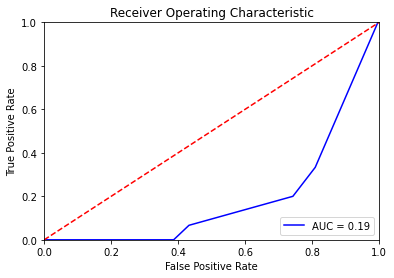

In [444]:
fpr, tpr, threshold = roc_curve(y_test, y_predict, pos_label= 2)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our QuadraticDiscriminantAnalysis is: {roc_auc}")

# Plotting the ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Summary of Model 

. A classifier with a quadratic decision boundary, generated by fitting class conditional densities to the data and using Bayes’ rule.

. The model fits a Gaussian density to each class.


. all Metrics values was under 30%

. QDA assumes that each class follow a Gaussian distribution, but with the values of metrics we can say that we didn't have a 
  Gaussien distrubtion of data (unbalanced data).
  
. the ROC plot with a AUc line under the red line,






In [427]:
# seconde estimator for VotingClassifier  
rf1 = RandomForestClassifier()
rf1.fit(x_train, y_train)
y_val_pred = rf1.predict_proba(x_test)
acc_rf1 = rf1.score(x_test, y_test)
acc_lr = rf1.score(x_test, y_test)

print('The accuracy of the Random Forest Classifier is:', acc_lr * 100, '%')

The accuracy of the Random Forest Classifier is: 50.67595247849243 %


# VotingClassifier

In [429]:
eclf = VotingClassifier(estimators=[('clf', clf), ('rf1', rf1)], voting="soft")
eclf.fit(x_train, y_train)

y_pred = eclf.predict(x_test)
acc_rf1 = eclf.score(x_test, y_test)

acc_rf1

0.40393281442031953

[[  0   9   3   1   2   0   0   0]
 [  1   7   9   8   7   5   1   0]
 [  0  19  27  28  27  20   0   0]
 [  1  22  20  44  61  57   2   0]
 [  2  36  12  90 178 255  16   1]
 [  0  44  21  41 103 469  77   5]
 [  1  65  15  16  23 251 232  11]
 [  1  17   2   1   1  14  31  29]]


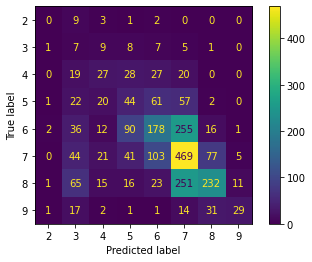

In [445]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

# confusion_matrix funnction a matrix containing the summary of predictions
print(confusion_matrix(y_test, y_pred))

# plot_confusion_matrix function is used to visualize the confusion matrix
plot_confusion_matrix(eclf, x_test,y_test)
plt.show()

In [446]:
from sklearn.metrics import f1_score

# Calculating the F1 score of classifier
print(f"F1 Score of the VotingClassifier is: {f1_score(y_test, y_pred, average='macro')}")



F1 Score of the VotingClassifier is: 0.28094723257191206


In [447]:
from sklearn.metrics import recall_score

# Calculating the recall score of classifier
print(f"Recall Score of the VotingClassifier is: {recall_score(y_test, y_pred,average='macro')}")



Recall Score of the VotingClassifier is: 0.27733063540861286


In [448]:
 from sklearn.metrics import precision_score
# Calculating the precision_score of classifier
print(f"precision_score of the VotingClassifier is: {precision_score(y_test, y_pred,average='macro')}")

precision_score of the VotingClassifier is: 0.3286473167049077


AUC for our VotingClassifier is: 0.1028304479252542


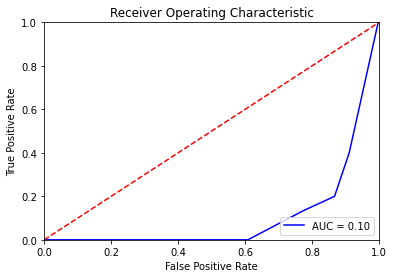

In [449]:
# Importing all necessary libraries
from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(y_test, y_pred, pos_label= 2)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our VotingClassifier is: {roc_auc}")

# Plotting the ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()